In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

# Load data

In [2]:
bespoke_iter1 = pd.read_csv(
    "../../../data/training_logs/losses_bespoke_iter1.csv", delimiter="\t"
)
bespoke_iter2 = pd.read_csv(
    "../../../data/training_logs/losses_bespoke_iter2.csv", delimiter="\t"
)
patched_species_iter2 = pd.read_csv(
    "../../../data/training_logs/losses_patched_species_iter2.csv", delimiter="\t"
)
patched_reference_iter2 = pd.read_csv(
    "../../../data/training_logs/losses_patched_reference_iter2.csv", delimiter="\t"
)
patched_species_iter1 = pd.read_csv(
    "../../../data/training_logs/losses_patched_species_iter1.csv", delimiter="\t"
)
patched_reference_iter1 = pd.read_csv(
    "../../../data/training_logs/losses_patched_reference_iter1.csv", delimiter="\t"
)

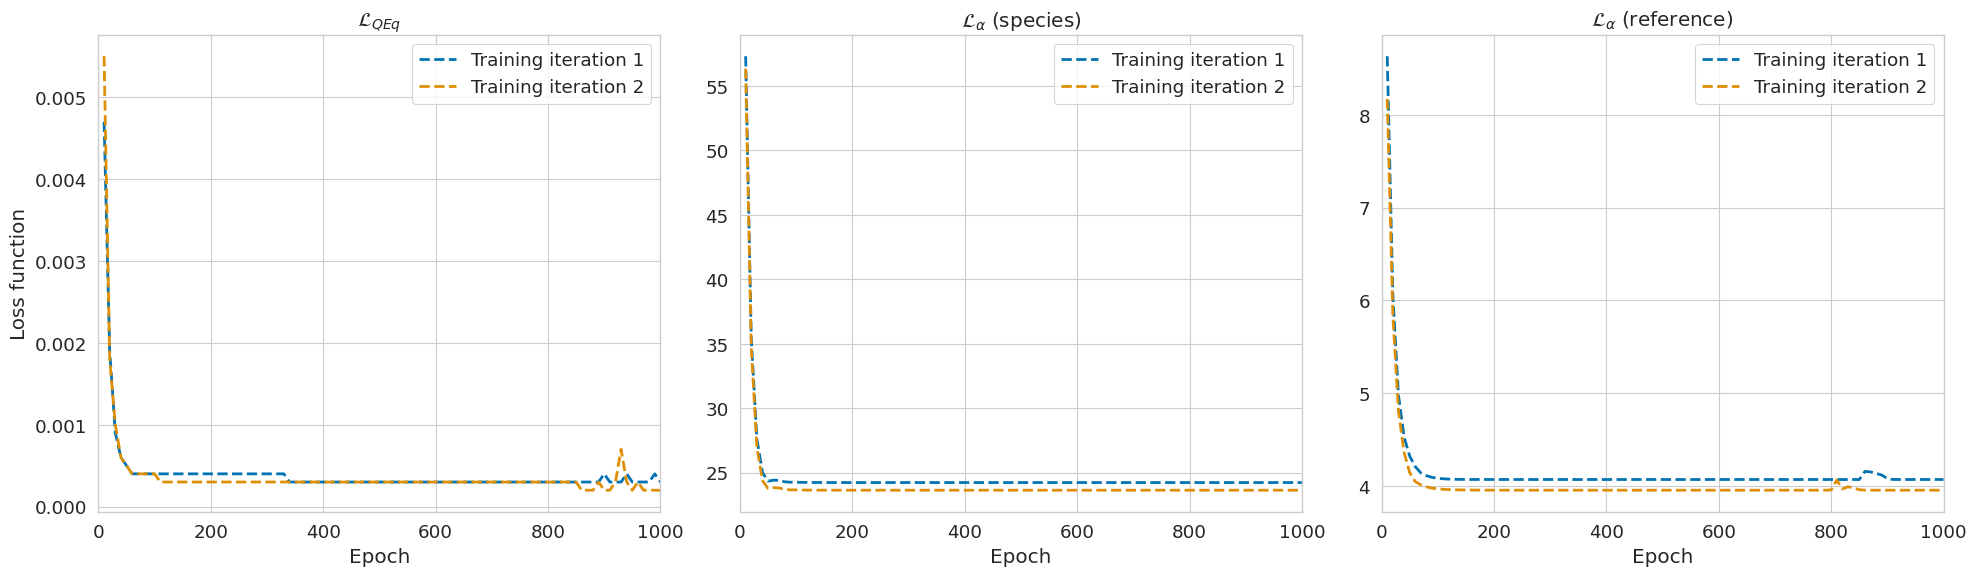

In [3]:
sns.set(style="whitegrid", palette="colorblind", context="paper", font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=False)

# Define columns and titles
columns = ["qeq", "alpha_species", "alpha_reference"]

# Plot each loss function
loss_titles = [
    "$\mathcal{L}_{QEq}$",
    "$\mathcal{L}_{\\alpha}$ (species)",
    "$\mathcal{L}_{\\alpha}$ (reference)",
]
for ax, col, loss_title in zip(axes, columns, loss_titles):
    ax.plot(
        bespoke_iter1["Iteration"],
        bespoke_iter1[col],
        label="Training iteration 1",
        linewidth=2,
        linestyle="--",
    )
    ax.plot(
        bespoke_iter2["Iteration"],
        bespoke_iter2[col],
        label="Training iteration 2",
        linewidth=2,
        linestyle="--",
    )
    ax.set_title(loss_title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss function")
    ax.set_xlim(0, 1000)
    ax.legend()

# Remove y labels from all but the first
for ax in axes[1:]:
    ax.set_ylabel("")

plt.tight_layout()
plt.savefig("loss_function_bespoke.pdf", dpi=300, bbox_inches="tight")

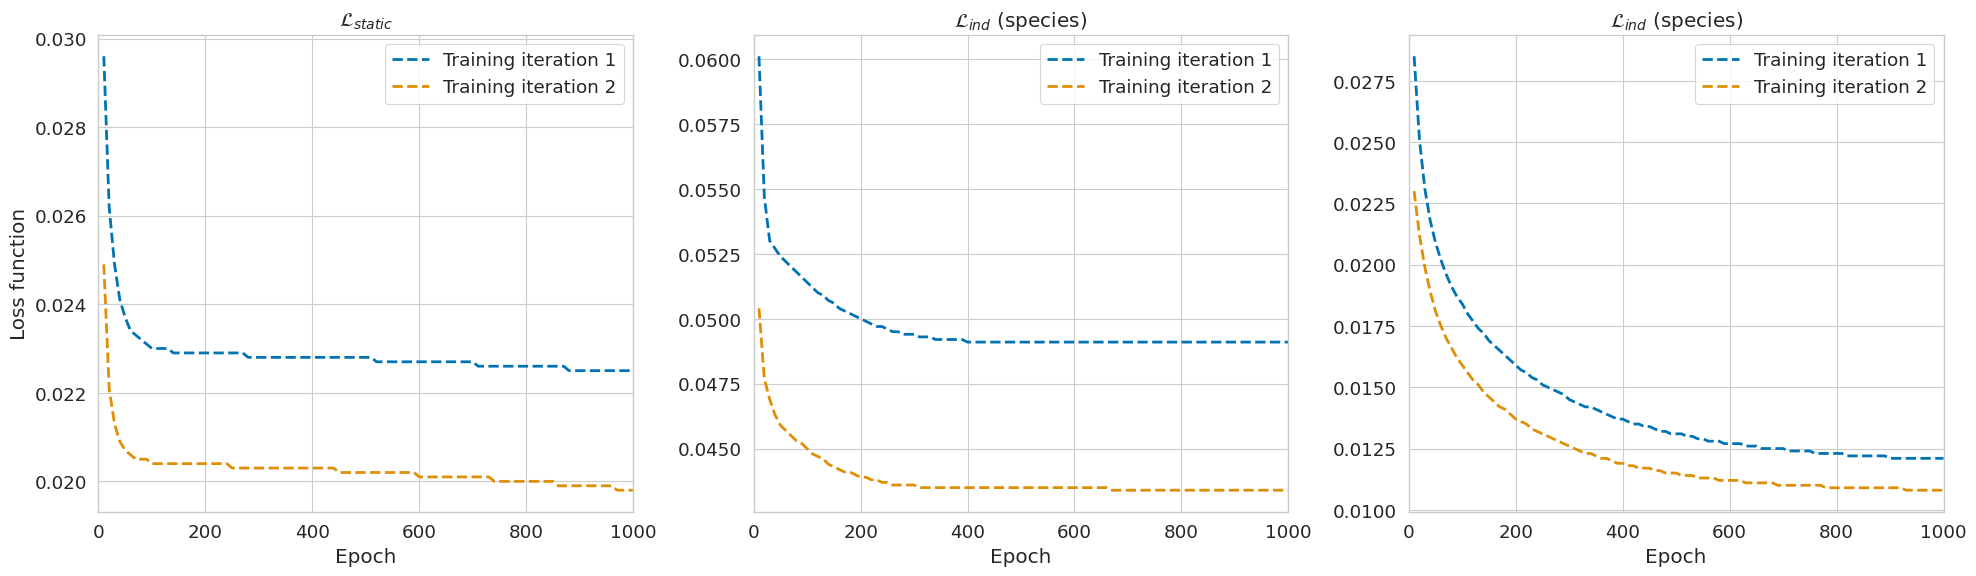

In [4]:
sns.set(style="whitegrid", palette="colorblind", context="paper", font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=False)

# Define columns and titles
columns = ["static", "induced"]

# Plot each loss function
loss_titles = [
    "$\mathcal{L}_{static}$",
    "$\mathcal{L}_{ind}$ (species)",
    "$\mathcal{L}_{ind}$ (reference)",
]
for ax, col, loss_title in zip(axes, columns, loss_titles):
    ax.plot(
        patched_species_iter1["Iteration"],
        patched_species_iter1[col],
        label="Training iteration 1",
        linewidth=2,
        linestyle="--",
    )
    ax.plot(
        patched_species_iter2["Iteration"],
        patched_species_iter2[col],
        label="Training iteration 2",
        linewidth=2,
        linestyle="--",
    )
    ax.set_title(loss_title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss function")
    ax.legend()

    ax.set_xlim(0, 1000)

axes[2].plot(
    patched_reference_iter1["Iteration"],
    patched_reference_iter1[col],
    label="Training iteration 1",
    linewidth=2,
    linestyle="--",
)
axes[2].plot(
    patched_reference_iter2["Iteration"],
    patched_reference_iter2[col],
    label="Training iteration 2",
    linewidth=2,
    linestyle="--",
)
axes[2].set_title(loss_title)
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Loss function")
axes[2].legend()

# Remove y labels from all but the first
for ax in axes[1:]:
    ax.set_ylabel("")

plt.tight_layout()
plt.savefig("loss_function_patched.pdf", dpi=300, bbox_inches="tight")